In [12]:
library(tidyverse)

In [13]:
df <- read_delim('data.csv', delim = ';')

Parsed with column specification:
cols(
  .default = col_double(),
  add_info = col_character(),
  gender = col_character(),
  date = col_character(),
  education = col_character(),
  avdn_order = col_character(),
  a_nitt = col_character(),
  v_nitt = col_character(),
  d_nitt = col_character(),
  n_nitt = col_character()
)
See spec(...) for full column specifications.


In [14]:
glimpse(df)

Observations: 81
Variables: 67
$ sub_id                <dbl> 1, 22, 32, 4, 11, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ add_info              <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, "Dużo grał …
$ gender                <chr> "female", "male", "male", "female", "male", "ma…
$ date                  <chr> "12.05.2017", "16.05.2017", "17.05.2017", "17.0…
$ age                   <dbl> 63, 25, 69, 66, 26, 67, 63, 30, 30, 29, 26, 40,…
$ lefty                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ education             <chr> "higher", "higher", "higher", "higher", "mid", …
$ years_music_education <dbl> 0, 2, 0, 0, 4, 0, 0, 2, 6, 10, 1, 0, 0, 3, 5, 6…
$ curr_making_music     <dbl> 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,…
$ curr_mood             <dbl> 3, 8, 7, 5, 8, 7, 8, 10, 7, 8, 7, 5, 8, 10, 7, …
$ curr_hr               <dbl> 107, 76, 83, 80, 69, 81, 70, 84, 105, 76, 91, 1…
$ curr_bp_sys           <dbl> 141, 133, 123, 155, 163, 136, 134, 129, 123, 13…
$ curr_bp_dias       

In [15]:
prefs <- select(df, ends_with("pref"))

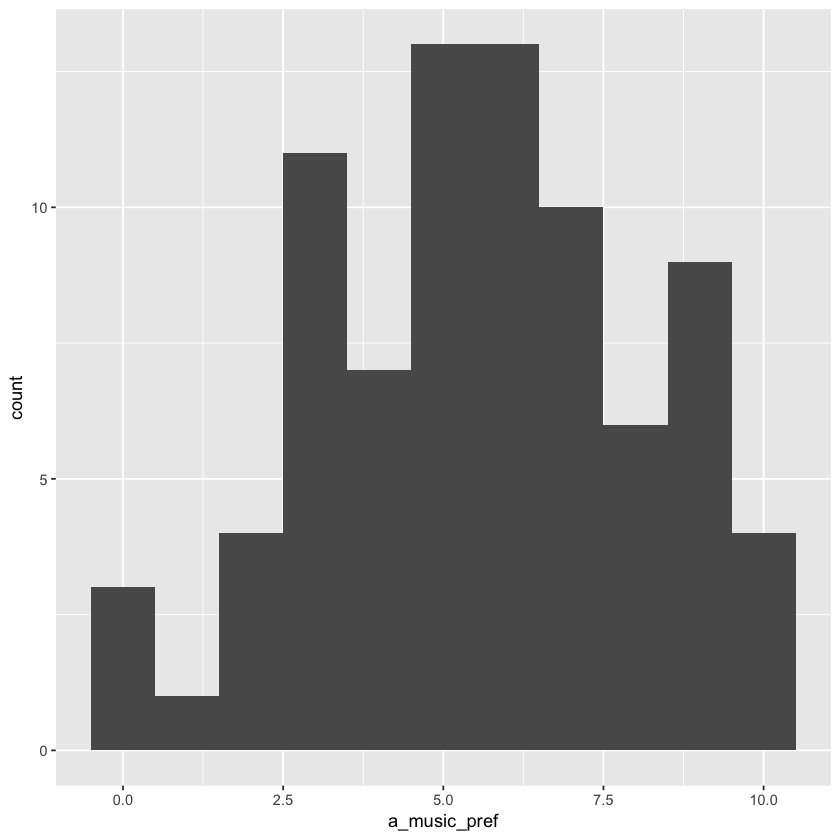

In [18]:
ggplot(prefs) + geom_histogram(aes(a_music_pref), binwidth = 1)

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

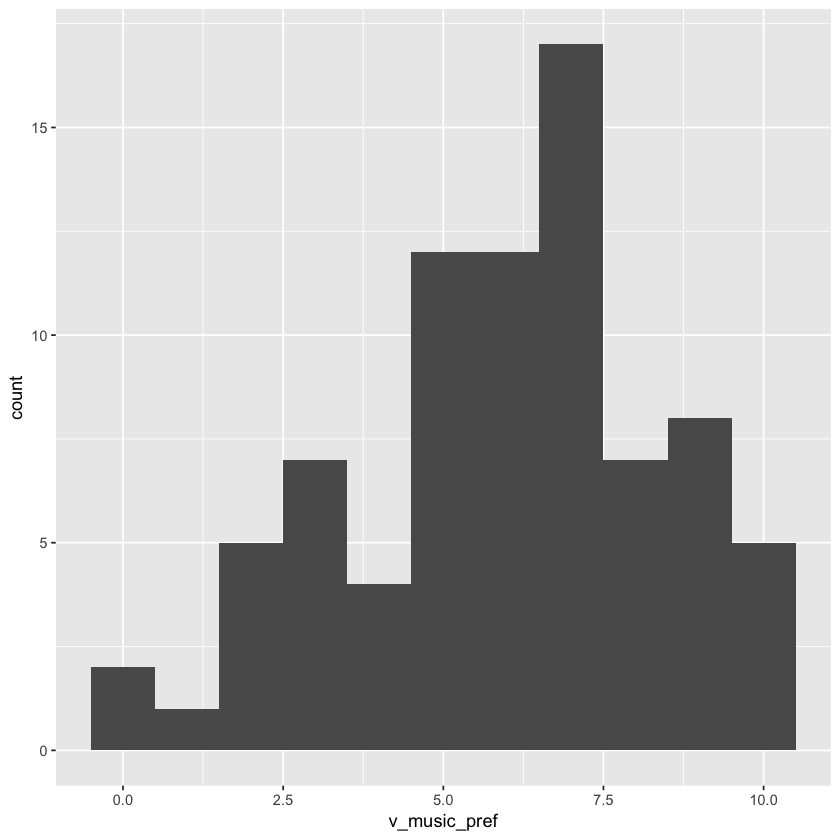

In [19]:
ggplot(prefs) + geom_histogram(aes(v_music_pref), binwidth = 1)

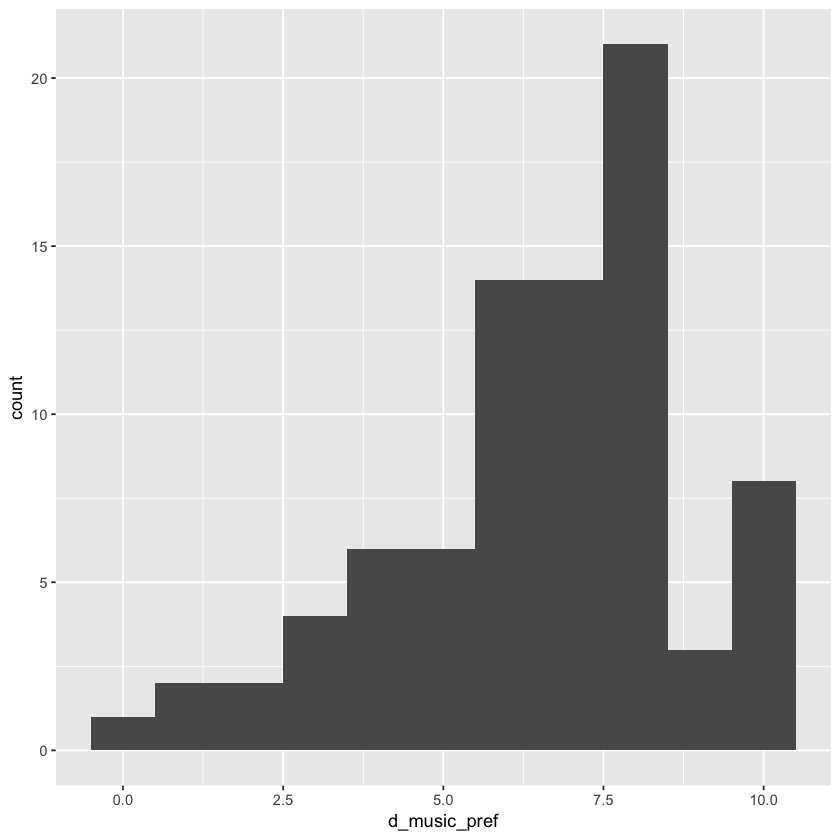

In [20]:
ggplot(prefs) + geom_histogram(aes(d_music_pref), binwidth = 1)